# Topic :Titanic-Machine Learning from Disaster

In [ ]:
# Task : Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle.
#Explore the relationships between variables and identify patterns and trends in the data

In [1]:
pip install -U seaborn pandas


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("modified_file.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,111369,30.0000,C


# 2. Initial Data Overview 

In [ ]:
## Display the first few rows and basic information

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,373450,8.0500,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,370376,7.75,Q


In [6]:
print(data.info()) #reveals the data types and counts of non-null entries for each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB
None


In [7]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   24.365881    0.381594   32.204208
std     257.353842    0.486592    0.836071   18.066380    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000    8.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   24.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   36.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   92.000000    6.000000  512.329200


# 3 Data Cleaning

In [8]:
# Check for missing values and duplicates
print("Missing values:\n", data.isnull().sum())

Missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [9]:
print("Duplicates:", data.duplicated().sum())

Duplicates: 0


In [10]:
# Convert categorical columns to 'category' data type
data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

In [11]:
# 1. Ensure 'Pclass' is treated as a category if it's meant to be categorical
data['Pclass'].dtype != 'category'
data['Pclass'] = data['Pclass'].astype('category')

In [12]:
# 2. Explicitly convert 'Sex' and 'Embarked' to category if they aren't already
data['Sex'].dtype != 'category'
data['Sex'] = data['Sex'].astype('category')

In [13]:
data['Embarked'].dtype != 'category'
data['Embarked'] = data['Embarked'].astype('category')

In [ ]:
data

# 4 Data Visualization

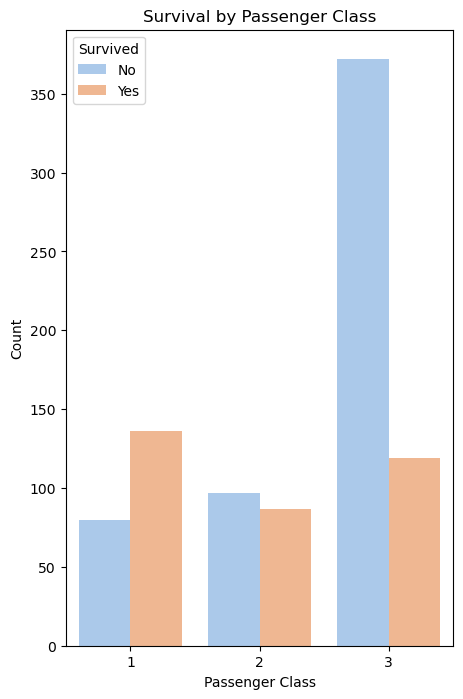

In [16]:
# 1. Survival Rate by Passenger Class
plt.figure(figsize=(5, 8))
sns.countplot(x='Pclass', hue='Survived', data=data, palette='pastel')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

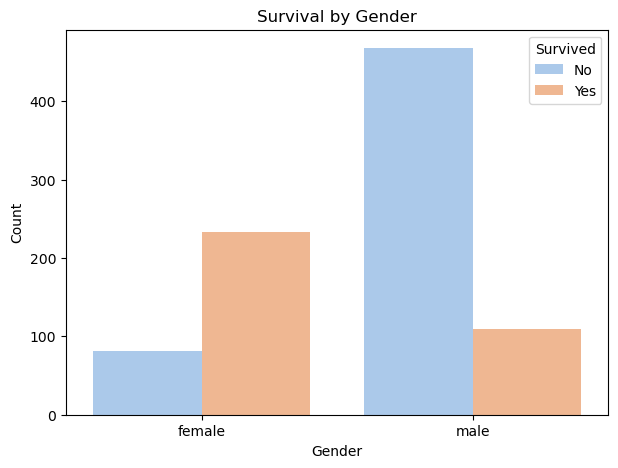

In [18]:
# Survival Rate by Gender
plt.figure(figsize=(7, 5))
sns.countplot(x='Sex', hue='Survived', data=data, palette='pastel')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

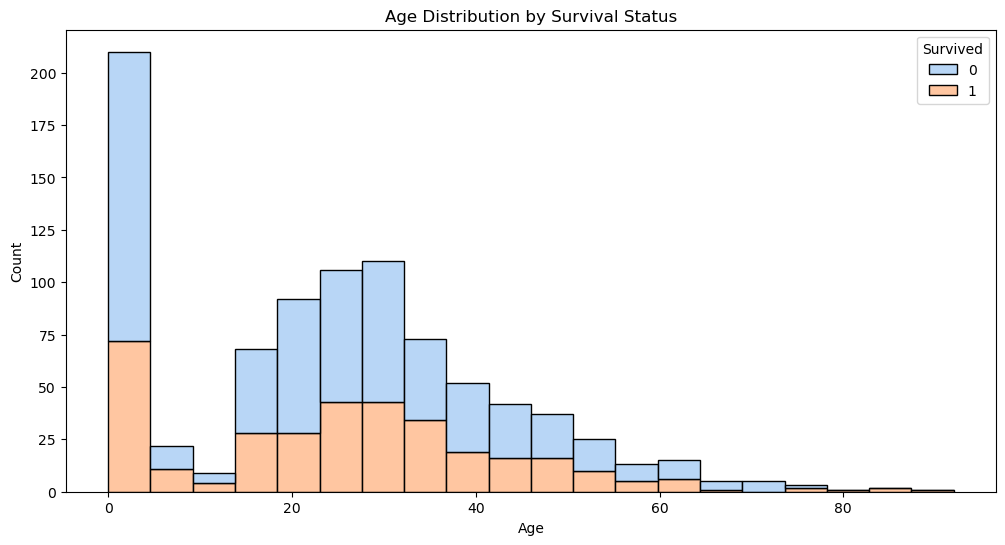

In [19]:
# 2. Age Distribution by Survival
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x="Age", hue="Survived", multiple="stack", palette="pastel", bins=20)
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

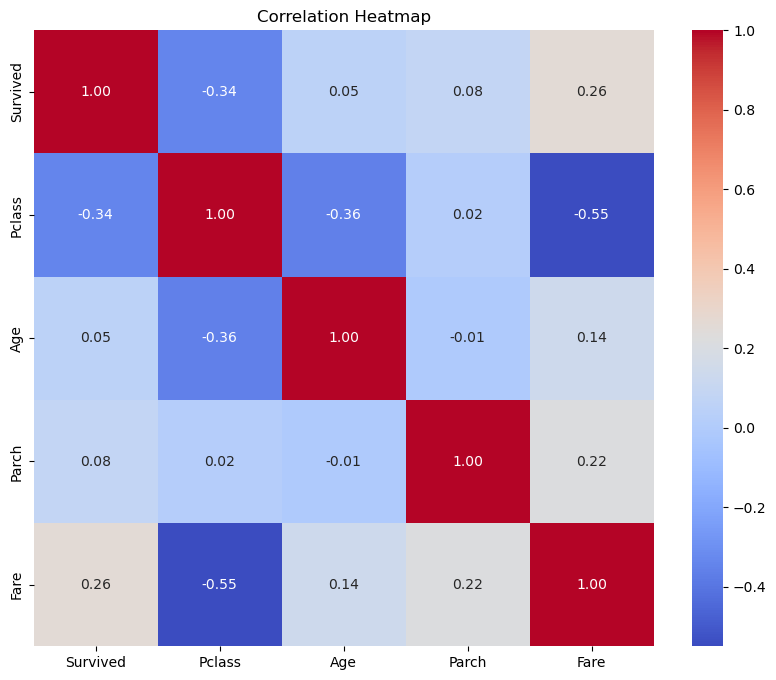

In [20]:
# 3. Correlation Heatmap for Numerical Columns
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Survived', 'Pclass', 'Age', 'Parch', 'Fare']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Conclusion

In [ ]:
#The analysis reveals that passenger class, gender, and age were significant factors in survival outcomes on the Titanic. 
#First-class passengers, women, and children were prioritized during the evacuation, leading to higher survival rates in these groups. 
#The data suggests a structured evacuation process that favored certain demographics, likely reflecting the societal norms and protocols of the time.

#This EDA provides a basis for further analysis, such as predictive modeling to determine a passenger's likelihood of survival based on these factors. Let me know if you need additional insights or further analysis!